# fcc-medical-data-visualizer

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from urllib.request import urlretrieve

In [4]:
df=pd.read_csv("medical_examination.csv")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
overweight = (df['weight']/((df['height']/100)**2)>25).astype(int)
df['overweight'] = overweight

In [6]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [7]:
df["cholesterol"]=(df["cholesterol"]>1).astype(int)

In [8]:
df["gluc"]=(df["gluc"]>1).astype(int)

In [9]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [10]:
df_cat=df.melt(id_vars=['cardio'],value_vars=sorted(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']))

In [11]:
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


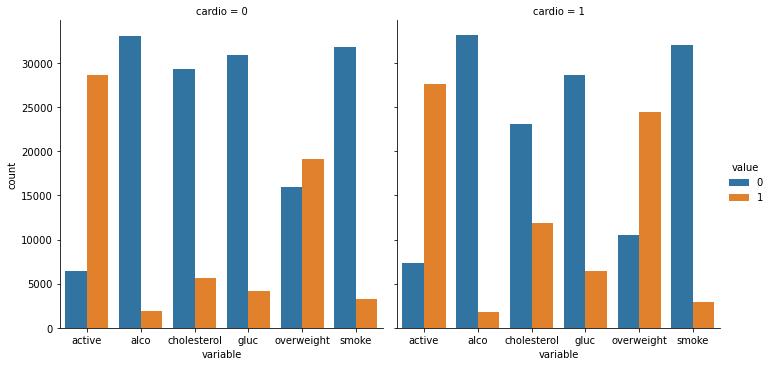

In [12]:
 g = sns.catplot(data=df_cat, kind='count', x='variable', hue='value',col="cardio")

In [13]:
df_heat=df[(df['ap_lo']<=df['ap_hi'])&(df['height']>=df['height'].quantile(0.025)) & (df['height']<=df['height'].quantile(0.975))
          &(df['weight']>=df['weight'].quantile(0.025)) & (df['weight']<=df['weight'].quantile(0.975))]

In [14]:
corr_matrix=df_heat.corr()
corr_matrix

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [15]:
mask=np.triu(corr_matrix)

In [16]:
mask

array([[ 1.00000000e+00,  2.50729691e-03,  3.42610273e-03,
         3.25916709e-04,  1.49333224e-04,  3.49238023e-03,
         4.83670793e-04,  3.71939143e-03,  2.28909034e-03,
        -2.73227725e-03, -7.08059804e-04,  5.89114223e-03,
         3.90011059e-03, -6.79420314e-04],
       [ 0.00000000e+00,  1.00000000e+00, -1.81320052e-02,
        -7.69318347e-02,  7.01683896e-02,  1.86894095e-02,
         1.53507973e-01,  1.29996176e-01,  8.69901449e-02,
        -4.43706471e-02, -2.69695382e-02, -1.14451266e-02,
         2.40241089e-01,  8.95726547e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         5.05784851e-01,  1.29979320e-01,  5.06250408e-03,
         5.99466484e-02, -3.76050443e-02, -2.13573847e-02,
         3.37435881e-01,  1.68637124e-01,  7.86370242e-03,
         2.31999158e-03, -5.29296848e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  2.51502865e-01,  4.58573625e-03,
         1.79224331e-02, -6.35217890e-02, -3.

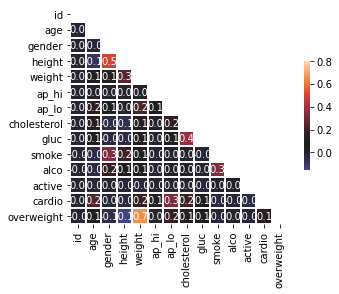

In [17]:
ax = sns.heatmap(
        corr_matrix, annot=True, fmt='.1f', linewidths=1, mask=mask, 
        vmax=.8, center=0.09, square=True, cbar_kws={'shrink':0.5})